In [6]:
import pandas as pd
import numpy as np 

In [7]:
df_b = pd.read_csv("/Users/jairmartinez/Documents/UPY/Data mining/Final Project Data Mining/Data Frames/updated_final_nowA.csv")

/var/folders/7c/4cf3ksfd16nb16xxzztzhsmr0000gn/T/ipykernel_2929/3598269408.py:1: DtypeWarning: Columns (16,33,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_b = pd.read_csv("/Users/jairmartinez/Documents/UPY/Data mining/Final Project Data Mining/Data Frames/updated_final_nowA.csv")


In [8]:
df_b["nombre_act"].unique()

array(['Piscicultura y otra acuicultura, excepto camaronicultura',
       'Despepite de algodón', 'Extracción de petróleo y gas',
       'Captación, tratamiento y suministro de agua realizados por el sector público',
       'Generación, transmisión y distribución de energía eléctrica',
       'Captación, tratamiento y suministro de agua realizados por el sector privado',
       'Construcción de obras de urbanización', 'Trabajos de albañilería',
       'Edificación de naves y plantas industriales, excepto la supervisión',
       'Edificación de inmuebles comerciales y de servicios, excepto la supervisión',
       'Edificación de vivienda unifamiliar',
       'Supervisión de edificación residencial',
       'Construcción de obras para el tratamiento, distribución y suministro de agua y drenaje',
       'Preparación de terrenos para la construcción',
       'Supervisión de edificación de inmuebles comerciales y de servicios',
       'Otras instalaciones y equipamiento en construcciones',


In [9]:
df_b["Year_Month"].unique()

array([2016, 2017, 2018, 2019, 2020, 2021, 2022])

## I decided to aggregate and check how a PCA dimensionality reduction would work

In [11]:
# Aggregating the data: Count of businesses for each nombre_act per Year_Month
aggregated_data = df_b.groupby(['nombre_act', 'Year_Month']).size().reset_index(name='count')

# Pivot the data to get a matrix form where rows are nombre_act and columns are Year_Month
pivot_table = aggregated_data.pivot(index='nombre_act', columns='Year_Month', values='count').fillna(0)

# Displaying the first few rows of the pivoted table
pivot_table


Year_Month,2016,2017,2018,2019,2020,2021,2022
nombre_act,,,,,,,
Acabado de productos textiles,0.0,0.0,0.0,2.0,2.0,2.0,2.0
Actividades administrativas de instituciones de bienestar social,102.0,102.0,102.0,88.0,78.0,78.0,78.0
Actividades de seguridad nacional,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Administración de cajas de pensión y de seguros independientes,0.0,0.0,0.0,0.0,1.0,2.0,2.0
Administración de cementerios pertenecientes al sector privado,4.0,4.0,4.0,6.0,4.0,6.0,6.0
...,...,...,...,...,...,...,...
Transporte colectivo urbano y suburbano de pasajeros en automóviles de ruta fija,0.0,0.0,0.0,15.0,19.0,0.0,0.0
Transporte de pasajeros en taxis de sitio,0.0,0.0,0.0,18.0,18.0,0.0,0.0
Transporte turístico por tierra,4.0,4.0,4.0,4.0,4.0,4.0,4.0


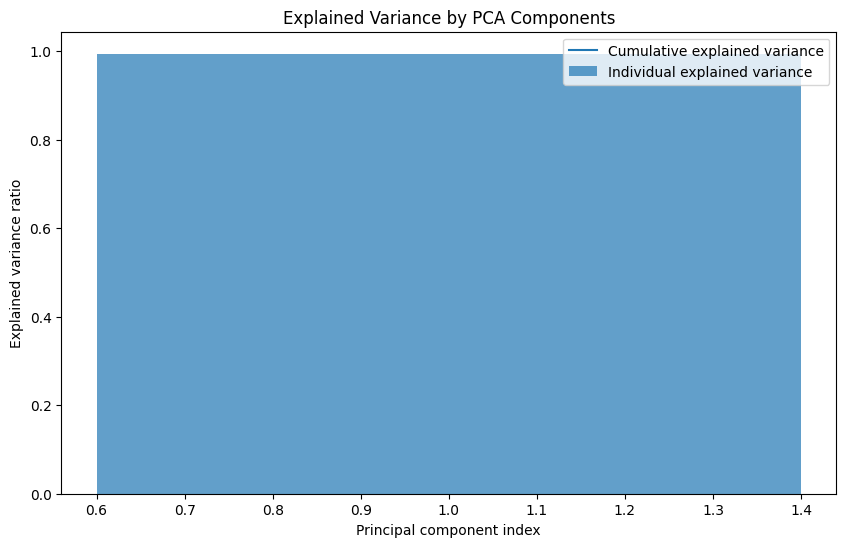

(1, 0.9945863215407685)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivot_table)

# Applying PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
principal_components = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center',
        label='Individual explained variance')
plt.step(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title('Explained Variance by PCA Components')
plt.show()

# Number of components
num_components = pca.n_components_

num_components, explained_variance_ratio.cumsum()[-1]


### It was unusual so i decided to focus on a more time series analysis, since we have plenty of years

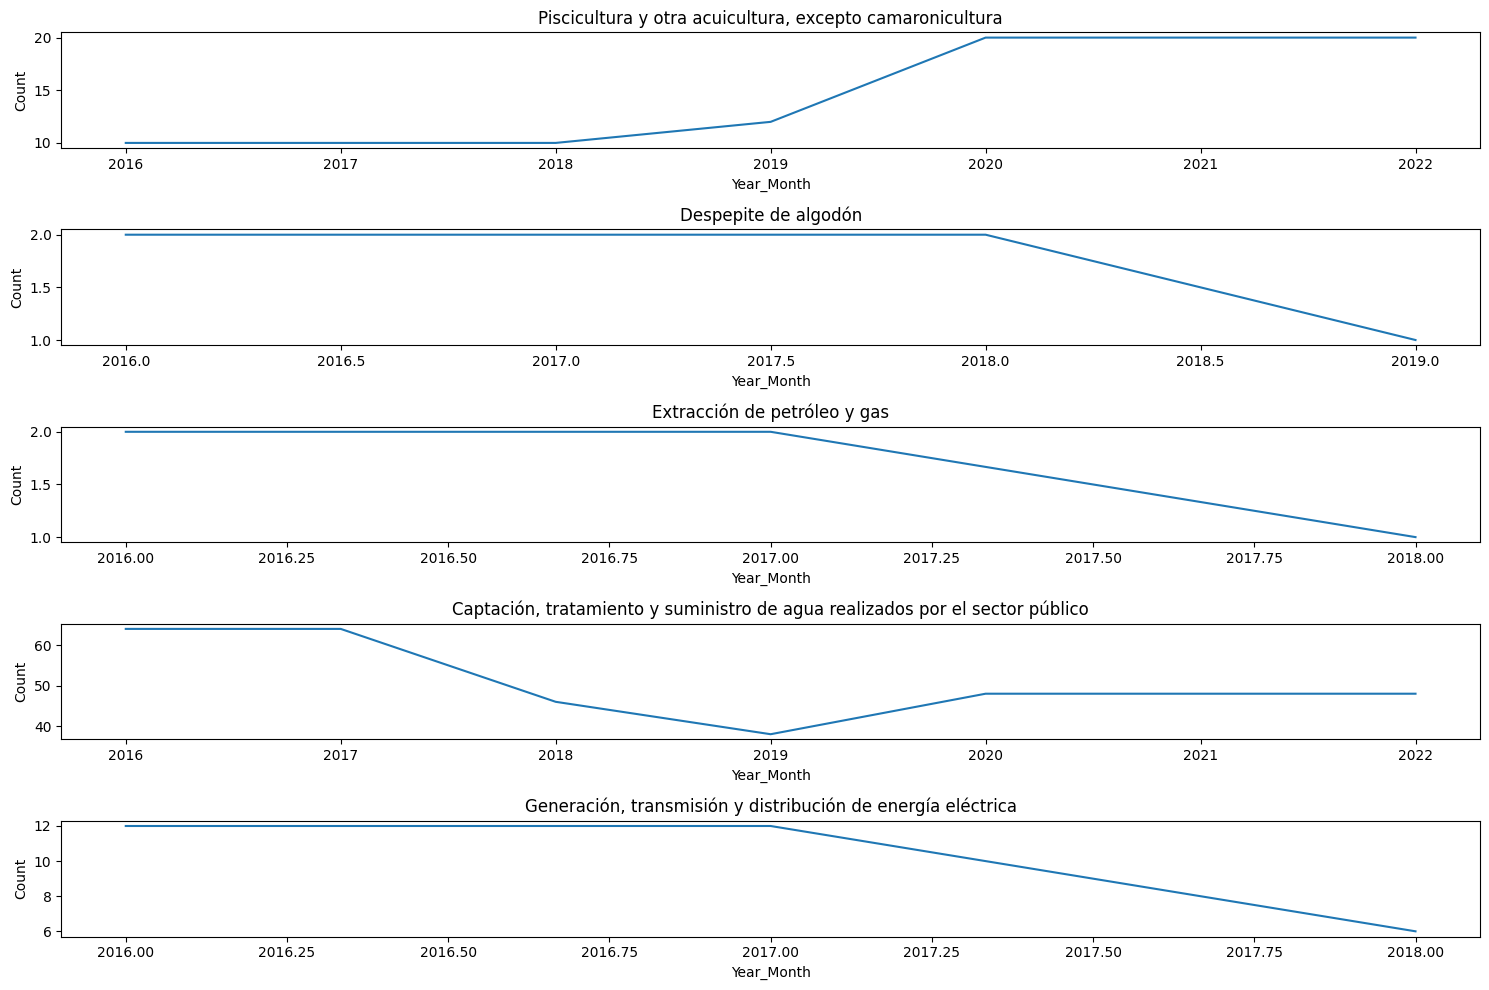

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Here, we'll take a few random activities for demonstration purposes.
sample_activities = df_b['nombre_act'].dropna().unique()[:5]

# Creating time series plots for these activities
plt.figure(figsize=(15, 10))

for i, activity in enumerate(sample_activities, 1):
    # Filtering data for the specific activity
    ts_data = df_b[df_b['nombre_act'] == activity].groupby('Year_Month').size()
    
    # Creating a subplot for each activity
    plt.subplot(len(sample_activities), 1, i)
    sns.lineplot(x=ts_data.index, y=ts_data.values)
    plt.title(activity)
    plt.ylabel('Count')
    plt.xlabel('Year_Month')

plt.tight_layout()
plt.show()


### With this overview, I decided to choose specific data, in which I took into account the social significance, the ones that have the most fulfilled data and that also has variability.

In [14]:
# Grouping data by 'nombre_act' and 'Year_Month' to count businesses
grouped_data = df_b.groupby(['nombre_act', 'Year_Month']).size().reset_index(name='count')

# Calculating the total count and the standard deviation of counts for each activity
activity_stats = grouped_data.groupby('nombre_act')['count'].agg(['sum', 'std', 'count']).reset_index()

# Filtering for activities with:
# - Sufficient data points (at least 50% of the time range)
# - High total count (to ensure significance)
# - High standard deviation (indicating variability)
selected_activities = activity_stats[
    (activity_stats['count'] >= grouped_data['Year_Month'].nunique() * 0.5) &
    (activity_stats['sum'] >= activity_stats['sum'].quantile(0.75)) &
    (activity_stats['std'] >= activity_stats['std'].quantile(0.75))
].sort_values(by='std', ascending=False)

# Displaying the top activities based on these criteria
selected_activities.head()


,nombre_act,sum,std,count
483,Restaurantes con servicio de preparación de ta...,6972,144.383748,7
486,Salones y clínicas de belleza y peluquerías,7537,133.474984,7
103,Comercio al por mayor de frutas y verduras fre...,1255,123.333848,7
489,Servicios de acceso a computadoras,2133,79.566983,7
144,Comercio al por menor de artículos usados,3842,71.022129,7


In [15]:
# Selecting additional activities that are different from the ones already chosen
# We aim for a diverse representation of sectors for a comprehensive comparison

# Filtering out the already selected activities
additional_activities = activity_stats[
    ~activity_stats['nombre_act'].isin([
        "Restaurantes con servicio de preparación de tacos y tortas",
        "Salones y clínicas de belleza y peluquerías",
        "Comercio al por menor de artículos usados"
    ])
]

# Selecting additional activities based on the same criteria: data completeness, variability, and total count
# Choosing activities that represent different sectors
additional_selected_activities = additional_activities[
    (additional_activities['count'] >= grouped_data['Year_Month'].nunique() * 0.5) &
    (additional_activities['sum'] >= additional_activities['sum'].quantile(0.75)) &
    (additional_activities['std'] >= additional_activities['std'].quantile(0.75))
].sort_values(by='std', ascending=False).head(3)

# Displaying the additional selected activities
additional_selected_activities[['nombre_act']]


,nombre_act
103,Comercio al por mayor de frutas y verduras fre...
489,Servicios de acceso a computadoras
43,Banca múltiple


#### I am going to apply a statistics model called ADF or Augmented Dickey-Fuller which can be used to check if there is a non-stationary nature and does not have a constant mean or variance over time

##### This is common in real-wolrd data and suggests that the number of businesses in the activities is influenced by time-dependent factos, trends or other non-constant elements. 

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import matplotlib.dates as mdates

# Function to analyze each activity
def analyze_activity(activity_name, df_b):
    # Filtering and aggregating data for the activity
    activity_data = df_b[df_b['nombre_act'] == activity_name].groupby('Year_Month').size()

    # Decomposing the time series into trend, seasonal, and residual components
    decomposition = seasonal_decompose(activity_data, model='additive', period=12)

    # Conducting the Augmented Dickey-Fuller test for stationarity
    adf_test = adfuller(activity_data)

    # Plotting the time series components
    plt.figure(figsize=(14, 7))
    plt.suptitle(f'Time Series Analysis of {activity_name}', fontsize=16)

    # Time Series Plot
    ax1 = plt.subplot(411)
    plt.plot(activity_data, label='Original')
    plt.legend(loc='upper left')
    plt.ylabel('Count')

    # Trend Component
    ax2 = plt.subplot(412, sharex=ax1)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend(loc='upper left')
    plt.ylabel('Trend')

    # Seasonal Component
    ax3 = plt.subplot(413, sharex=ax1)
    plt.plot(decomposition.seasonal, label='Seasonal')
    plt.legend(loc='upper left')
    plt.ylabel('Seasonality')

    # Residual Component
    ax4 = plt.subplot(414, sharex=ax1)
    plt.plot(decomposition.resid, label='Residual')
    plt.legend(loc='upper left')
    plt.ylabel('Residual')
    plt.xlabel('Year_Month')

    # Formatting x-axis
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # Printing the results of the stationarity test
    print(f'Results of Dickey-Fuller Test for {activity_name}:')
    print(f'Test Statistic: {adf_test[0]}')
    print(f'p-value: {adf_test[1]}')
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print(f'   {key}: {value}')


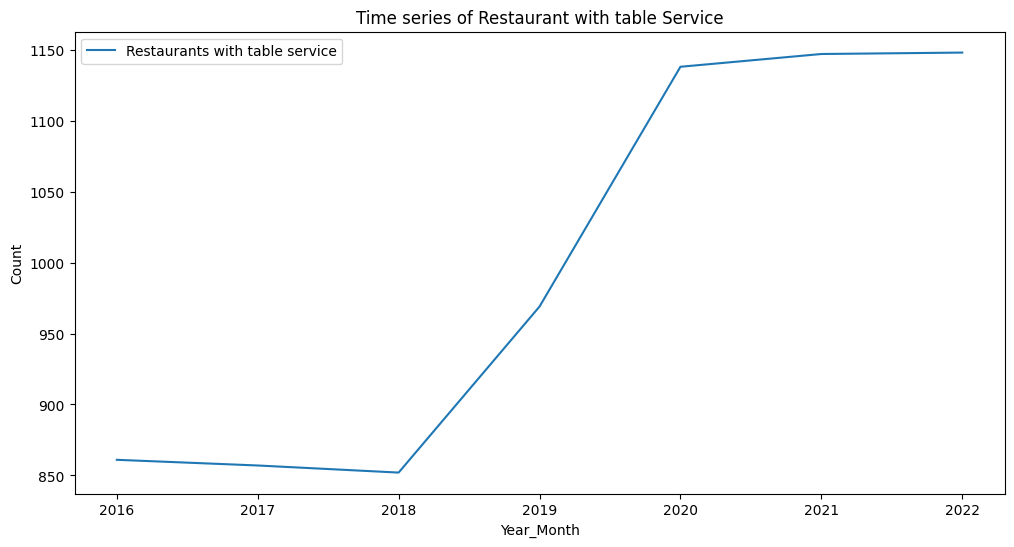

In [28]:
rest_table = df_b[df_b['nombre_act'] == "Restaurantes con servicio de preparación de tacos y tortas"].groupby('Year_Month').size()

# Conducting the Augmented Dickey-Fuller test for stationarity
adf_test_salons = adfuller(rest_table)

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(rest_table, label='Restaurants with table service')
plt.title('Time series of Restaurant with table Service')
plt.ylabel('Count')
plt.xlabel('Year_Month')
plt.legend()
plt.show()

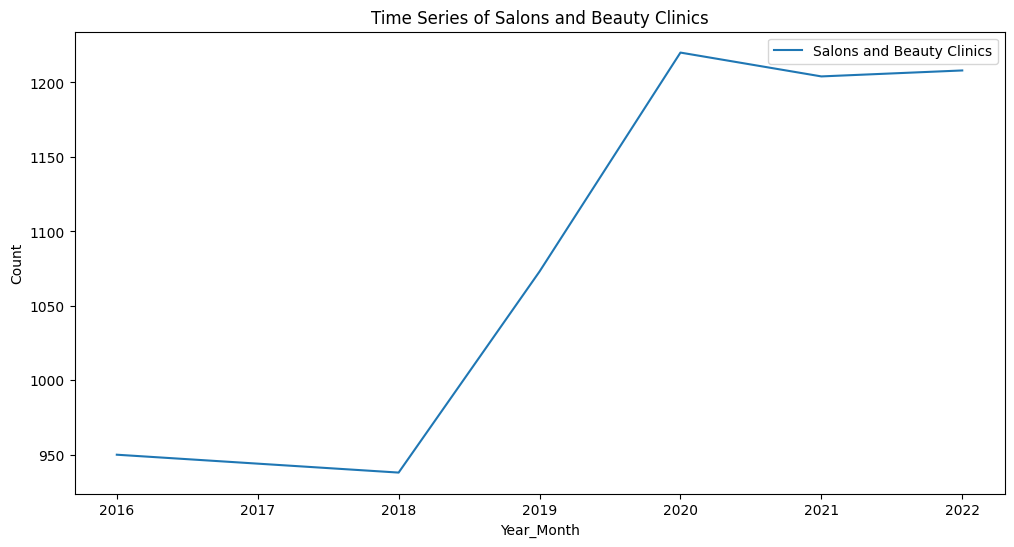

Results of Dickey-Fuller Test for Salons and Beauty Clinics:
Test Statistic: -0.5737596888721966
p-value: 0.8768017134775408
Critical Values:
   1%: -5.354256481481482
   5%: -3.6462381481481483
   10%: -2.901197777777778


In [29]:
# Analyzing the next activity: "Salones y clínicas de belleza y peluquerías" (Salons and Beauty Clinics)

# Filtering and aggregating data for the activity
salons_data = df_b[df_b['nombre_act'] == "Salones y clínicas de belleza y peluquerías"].groupby('Year_Month').size()

# Conducting the Augmented Dickey-Fuller test for stationarity
adf_test_salons = adfuller(salons_data)

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(salons_data, label='Salons and Beauty Clinics')
plt.title('Time Series of Salons and Beauty Clinics')
plt.ylabel('Count')
plt.xlabel('Year_Month')
plt.legend()
plt.show()

# Printing the results of the stationarity test
print('Results of Dickey-Fuller Test for Salons and Beauty Clinics:')
print(f'Test Statistic: {adf_test_salons[0]}')
print(f'p-value: {adf_test_salons[1]}')
print('Critical Values:')
for key, value in adf_test_salons[4].items():
    print(f'   {key}: {value}')


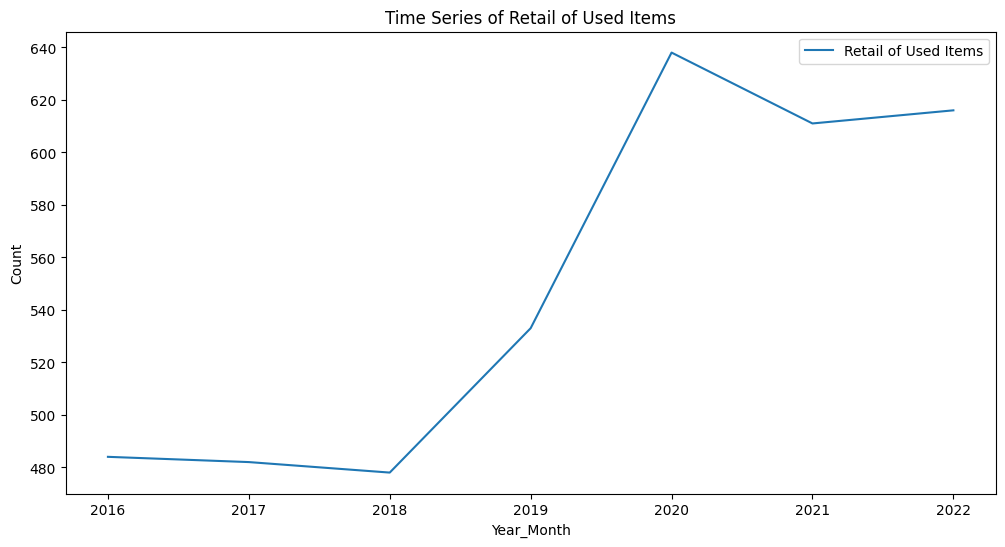

Results of Dickey-Fuller Test for Retail of Used Items:
Test Statistic: -0.7111415304201542
p-value: 0.8438424846149819
Critical Values:
   1%: -5.354256481481482
   5%: -3.6462381481481483
   10%: -2.901197777777778


In [30]:
# Filtering and aggregating data for the activity
retail_used_items_data = df_b[df_b['nombre_act'] == "Comercio al por menor de artículos usados"].groupby('Year_Month').size()

# Conducting the Augmented Dickey-Fuller test for stationarity
adf_test_retail_used_items = adfuller(retail_used_items_data)

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(retail_used_items_data, label='Retail of Used Items')
plt.title('Time Series of Retail of Used Items')
plt.ylabel('Count')
plt.xlabel('Year_Month')
plt.legend()
plt.show()

# Printing the results of the stationarity test
print('Results of Dickey-Fuller Test for Retail of Used Items:')
print(f'Test Statistic: {adf_test_retail_used_items[0]}')
print(f'p-value: {adf_test_retail_used_items[1]}')
print('Critical Values:')
for key, value in adf_test_retail_used_items[4].items():
    print(f'   {key}: {value}')


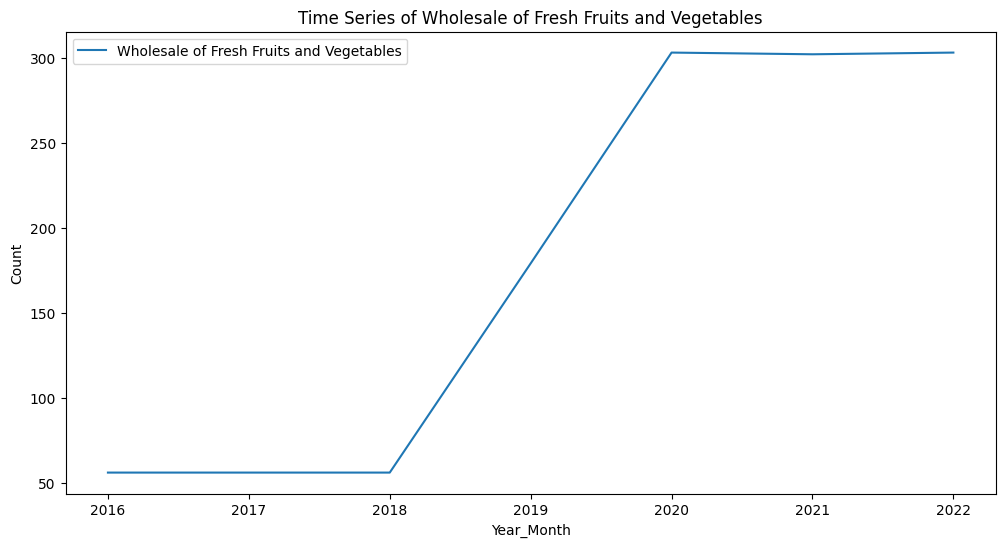

Results of Dickey-Fuller Test for Wholesale of Fresh Fruits and Vegetables:
Test Statistic: -0.5420350133537483
p-value: 0.8835493693722098
Critical Values:
   1%: -5.354256481481482
   5%: -3.6462381481481483
   10%: -2.901197777777778


In [31]:
# Filtering and aggregating data for the activity
wholesale_fruits_veggies_data = df_b[df_b['nombre_act'] == "Comercio al por mayor de frutas y verduras frescas"].groupby('Year_Month').size()

# Conducting the Augmented Dickey-Fuller test for stationarity
adf_test_wholesale_fruits_veggies = adfuller(wholesale_fruits_veggies_data)

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(wholesale_fruits_veggies_data, label='Wholesale of Fresh Fruits and Vegetables')
plt.title('Time Series of Wholesale of Fresh Fruits and Vegetables')
plt.ylabel('Count')
plt.xlabel('Year_Month')
plt.legend()
plt.show()

# Printing the results of the stationarity test
print('Results of Dickey-Fuller Test for Wholesale of Fresh Fruits and Vegetables:')
print(f'Test Statistic: {adf_test_wholesale_fruits_veggies[0]}')
print(f'p-value: {adf_test_wholesale_fruits_veggies[1]}')
print('Critical Values:')
for key, value in adf_test_wholesale_fruits_veggies[4].items():
    print(f'   {key}: {value}')


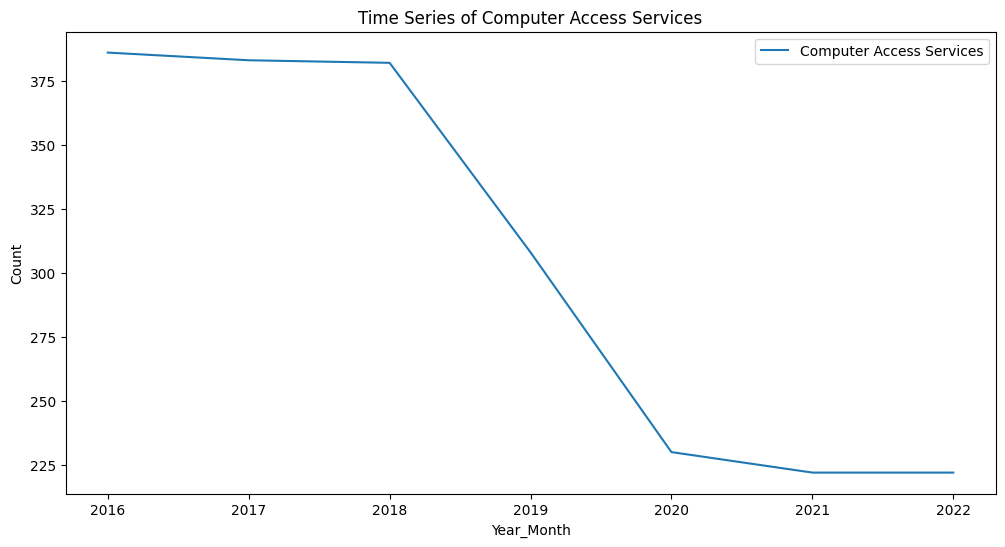

Results of Dickey-Fuller Test for Computer Access Services:
Test Statistic: -0.4830524197276659
p-value: 0.895281488145302
Critical Values:
   1%: -5.354256481481482
   5%: -3.6462381481481483
   10%: -2.901197777777778


In [32]:
# Filtering and aggregating data for the activity
computer_access_services_data = df_b[df_b['nombre_act'] == "Servicios de acceso a computadoras"].groupby('Year_Month').size()

# Conducting the Augmented Dickey-Fuller test for stationarity
adf_test_computer_access_services = adfuller(computer_access_services_data)

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(computer_access_services_data, label='Computer Access Services')
plt.title('Time Series of Computer Access Services')
plt.ylabel('Count')
plt.xlabel('Year_Month')
plt.legend()
plt.show()

# Printing the results of the stationarity test
print('Results of Dickey-Fuller Test for Computer Access Services:')
print(f'Test Statistic: {adf_test_computer_access_services[0]}')
print(f'p-value: {adf_test_computer_access_services[1]}')
print('Critical Values:')
for key, value in adf_test_computer_access_services[4].items():
    print(f'   {key}: {value}')


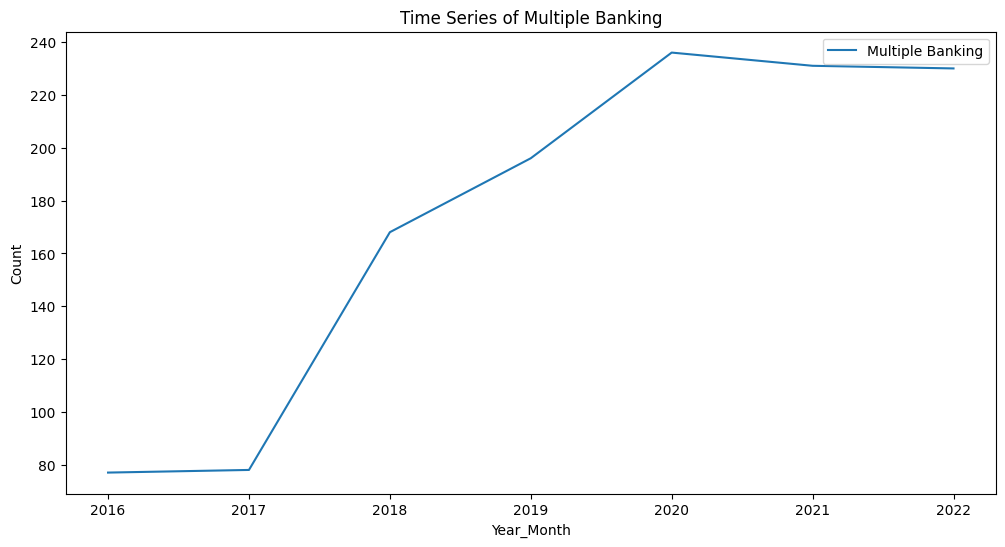

Results of Dickey-Fuller Test for Multiple Banking:
Test Statistic: -1.2521333639091814
p-value: 0.6507771919145349
Critical Values:
   1%: -5.354256481481482
   5%: -3.6462381481481483
   10%: -2.901197777777778


In [33]:
# Filtering and aggregating data for the activity
multiple_banking_data = df_b[df_b['nombre_act'] == "Banca múltiple"].groupby('Year_Month').size()

# Conducting the Augmented Dickey-Fuller test for stationarity
adf_test_multiple_banking = adfuller(multiple_banking_data)

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(multiple_banking_data, label='Multiple Banking')
plt.title('Time Series of Multiple Banking')
plt.ylabel('Count')
plt.xlabel('Year_Month')
plt.legend()
plt.show()

# Printing the results of the stationarity test
print('Results of Dickey-Fuller Test for Multiple Banking:')
print(f'Test Statistic: {adf_test_multiple_banking[0]}')
print(f'p-value: {adf_test_multiple_banking[1]}')
print('Critical Values:')
for key, value in adf_test_multiple_banking[4].items():
    print(f'   {key}: {value}')


### Now that I know the type of data and the result of applying a time series analysis, I am going to proceed utilizing the criminality rate

#### Since this dataset was already straightforward, I dont need to do a big cleaning, just the process of selecting the specific features

In [34]:
df_c = pd.read_csv("/Users/jairmartinez/Documents/UPY/Data mining/Final Project Data Mining/DelitosCuautla.csv")

In [35]:
df_c

,Unnamed: 0,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,88298,2015,17,Morelos,17006,Cuautla,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,...,1,0,2,1,0,2,3,0,1.0,2.0
1,88299,2015,17,Morelos,17006,Cuautla,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,...,0,0,0,0,0,0,0,2,0.0,0.0
2,88300,2015,17,Morelos,17006,Cuautla,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,...,0,3,3,3,1,2,4,5,3.0,2.0
3,88301,2015,17,Morelos,17006,Cuautla,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,...,3,0,0,0,0,0,0,0,0.0,0.0
4,88302,2015,17,Morelos,17006,Cuautla,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,...,0,0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,1922167,2023,17,Morelos,17006,Cuautla,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,...,1,1,1,4,1,2,0,4,NaN,NaN
878,1922168,2023,17,Morelos,17006,Cuautla,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,...,0,0,0,0,0,0,0,0,NaN,NaN
879,1922169,2023,17,Morelos,17006,Cuautla,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,...,0,0,0,0,0,0,0,0,NaN,NaN
880,1922170,2023,17,Morelos,17006,Cuautla,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,...,0,0,0,0,0,0,0,0,NaN,NaN


In [37]:
# Dropping unnecessary columns and focusing on the year and monthly crime counts
criminality_data_cleaned = df_c.drop(df_c.columns.difference(['Año', 'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']), axis=1)

# Excluding data for the year 2023
criminality_data_cleaned = criminality_data_cleaned[criminality_data_cleaned['Año'] != 2023]

# Aggregating the crime data by year
# Summing up the monthly crime counts for each year
criminality_data_yearly = criminality_data_cleaned.groupby('Año').sum()

# Resetting index to make 'Año' a column
criminality_data_yearly.reset_index(inplace=True)

# Displaying the aggregated yearly crime data
criminality_data_yearly


,Año,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,638,631,736,583,548,521,493,427,402,417,410.0,367.0
1,2016,402,429,455,392,438,409,444,481,413,483,439.0,454.0
2,2017,456,394,480,498,454,425,420,513,460,470,457.0,495.0
3,2018,513,503,554,628,603,508,547,516,567,526,494.0,568.0
4,2019,547,597,612,594,447,506,154,493,457,576,523.0,571.0
5,2020,514,491,556,408,478,509,547,550,431,519,503.0,469.0
6,2021,438,467,588,554,580,540,487,567,514,582,473.0,616.0
7,2022,493,475,614,558,574,528,498,579,474,488,462.0,444.0


In [38]:
# Creating a Total Crimes per Year Series
criminality_data_yearly['Total_Crimes'] = criminality_data_yearly.iloc[:, 1:].sum(axis=1)

# Selecting only the relevant columns ('Año' and 'Total_Crimes')
criminality_yearly_totals = criminality_data_yearly[['Año', 'Total_Crimes']]

# Renaming 'Año' to 'Year' for consistency with the business dataset
criminality_yearly_totals.rename(columns={'Año': 'Year'}, inplace=True)

# Displaying the yearly total crimes data
criminality_yearly_totals


/var/folders/7c/4cf3ksfd16nb16xxzztzhsmr0000gn/T/ipykernel_2929/2826548442.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminality_yearly_totals.rename(columns={'Año': 'Year'}, inplace=True)


,Year,Total_Crimes
0,2015,6173.0
1,2016,5239.0
2,2017,5522.0
3,2018,6527.0
4,2019,6077.0
5,2020,5975.0
6,2021,6406.0
7,2022,6187.0


In [40]:
# Excluding the year 2015 from the criminality data to match the business data timeframe
criminality_yearly_totals = criminality_yearly_totals[criminality_yearly_totals['Year'] > 2015]

# Displaying the updated yearly total crimes data
criminality_yearly_totals


,Year,Total_Crimes
1,2016,5239.0
2,2017,5522.0
3,2018,6527.0
4,2019,6077.0
5,2020,5975.0
6,2021,6406.0
7,2022,6187.0


In [42]:
# Preparing the data for analysis
# We already have the criminality data prepared in 'criminality_yearly_totals'
# We need to aggregate the business data by year for the selected activities and then merge it with the criminality data

# Selected activities for analysis
selected_activities = [
    "Restaurantes con servicio de preparación de tacos y tortas",
    "Salones y clínicas de belleza y peluquerías",
    "Comercio al por menor de artículos usados",
    "Comercio al por mayor de frutas y verduras frescas",
    "Servicios de acceso a computadoras",
    "Banca múltiple"
]

# Aggregating business data by year for each selected activity
business_data_aggregated = df_b[df_b['nombre_act'].isin(selected_activities)].groupby(['Year_Month', 'nombre_act']).size().reset_index(name='Count')
business_data_yearly = business_data_aggregated.groupby(['Year_Month', 'nombre_act']).agg({'Count':'sum'}).reset_index()

# Converting Year_Month to just the year for merging
business_data_yearly['Year'] = business_data_yearly['Year_Month'].apply(lambda x: int(x))

# Merging the business data with the criminality data
combined_data = pd.merge(business_data_yearly, criminality_yearly_totals, on='Year', how='inner')

# Pivoting the combined data for correlation analysis
combined_data_pivot = combined_data.pivot(index='Year', columns='nombre_act', values='Count')
combined_data_pivot = combined_data_pivot.join(criminality_yearly_totals.set_index('Year'))

# Displaying the first few rows of the combined and pivoted data
combined_data_pivot


,Banca múltiple,Comercio al por mayor de frutas y verduras frescas,Comercio al por menor de artículos usados,Restaurantes con servicio de preparación de tacos y tortas,Salones y clínicas de belleza y peluquerías,Servicios de acceso a computadoras,Total_Crimes
Year,,,,,,,
2016,77,56,484,861,950,386,5239.0
2017,78,56,482,857,944,383,5522.0
2018,168,56,478,852,938,382,6527.0
2019,196,179,533,969,1073,308,6077.0
2020,236,303,638,1138,1220,230,5975.0
2021,231,302,611,1147,1204,222,6406.0
2022,230,303,616,1148,1208,222,6187.0


In [45]:

# Correlation Analysis
correlation_results = combined_data_pivot.corr()['Total_Crimes'].drop('Total_Crimes')

# Displaying the correlation coefficients
correlation_results


Banca múltiple                                                0.771716
Comercio al por mayor de frutas y verduras frescas            0.459182
Comercio al por menor de artículos usados                     0.396157
Restaurantes con servicio de preparación de tacos y tortas    0.441432
Salones y clínicas de belleza y peluquerías                   0.428342
Servicios de acceso a computadoras                           -0.476302
Name: Total_Crimes, dtype: float64

##### The correlation overview shows us that, the one more correalted is the banks. But also, an interesting fact tells us that, as more computer access services decrease or vice versa, the criminality rises. Also we can take into account that, nowadays almost anyone has a computer at home. 

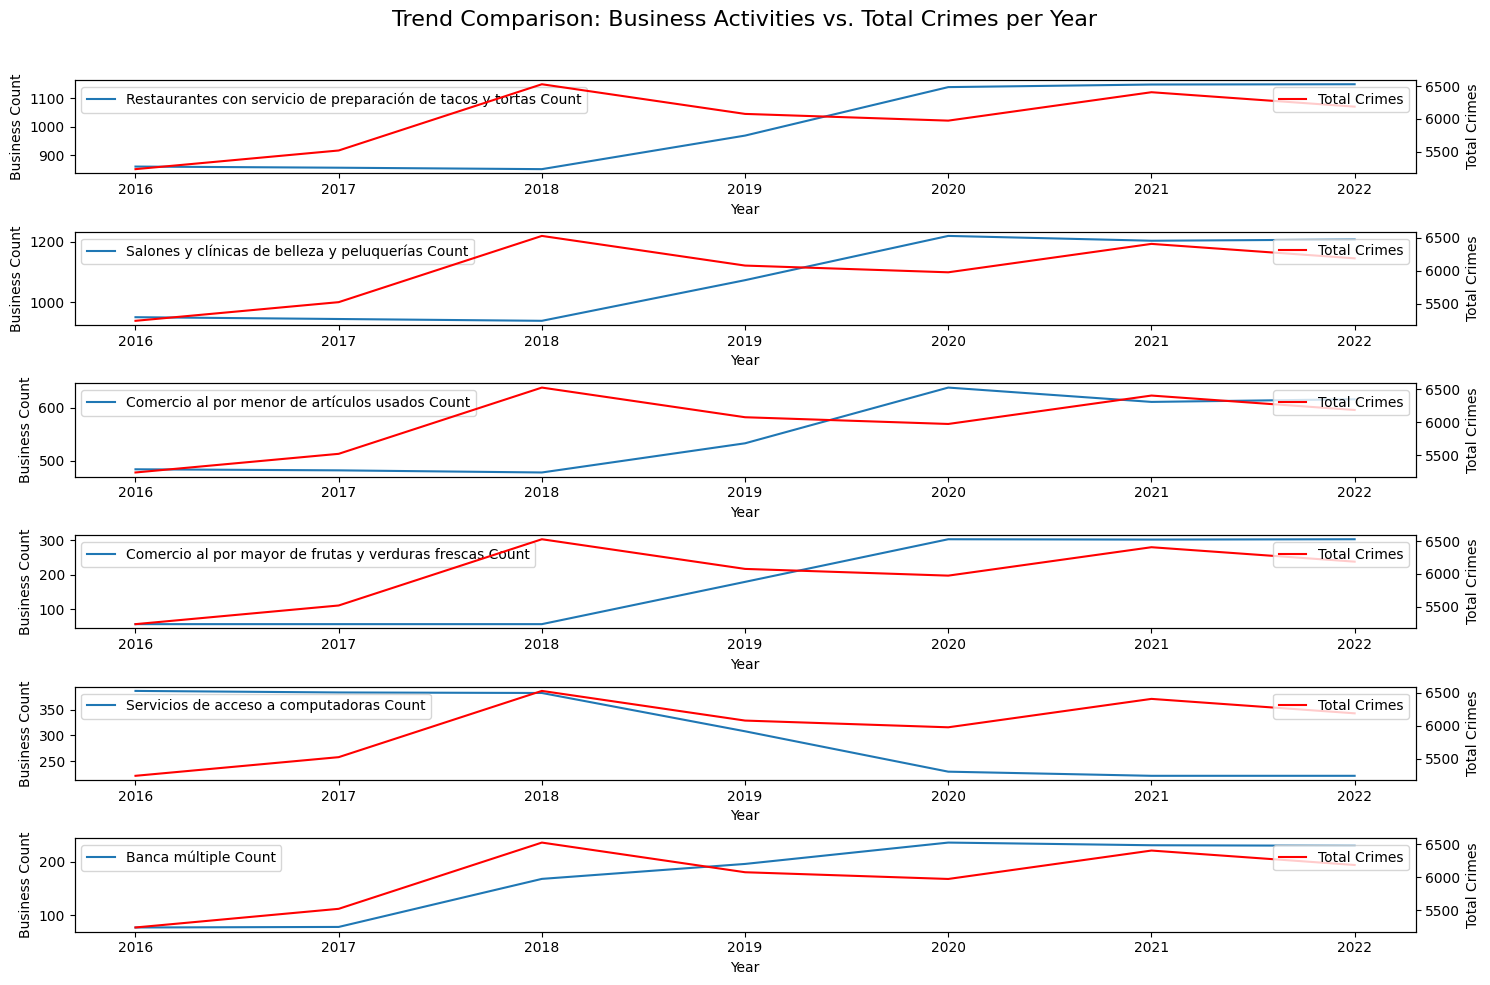

In [46]:
# Trend Comparison: Visualizing the trends in criminality rates and business activities

# Setting up the plot
plt.figure(figsize=(15, 10))
plt.suptitle('Trend Comparison: Business Activities vs. Total Crimes per Year', fontsize=16)

# Plotting each activity along with the total crimes
for i, activity in enumerate(selected_activities, 1):
    ax = plt.subplot(len(selected_activities), 1, i)
    ax2 = ax.twinx()

    # Plotting business activity count
    sns.lineplot(x=combined_data_pivot.index, y=combined_data_pivot[activity], ax=ax, label=f'{activity} Count')

    # Plotting total crimes
    sns.lineplot(x=combined_data_pivot.index, y=combined_data_pivot['Total_Crimes'], ax=ax2, color='r', label='Total Crimes')

    ax.set_ylabel('Business Count')
    ax2.set_ylabel('Total Crimes')
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


##### It is visible that, there is a strong corellation between crime and businesses, although there are some changes because of economic or social factors, we can tell that there are some areas where, even if crime grows, that business still can manage to overcome it

## I want a deeper insight, so I will include the types of crime commited, and check for correlation or any trend analysis

In [56]:
# Focusing on the 'Año', 'Tipo de delito', and monthly crime counts
criminality_by_type = df_c[['Año', 'Tipo de delito', 'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']]

# Excluding data for the year 2023 and year 2015
criminality_by_type = criminality_by_type[(criminality_by_type['Año'] != 2023) & (criminality_by_type['Año'] > 2015)]

# Aggregating the crime data by year and type
criminality_by_type_yearly = criminality_by_type.groupby(['Año', 'Tipo de delito']).sum()
criminality_by_type_yearly.reset_index(inplace=True)

# Creating a total crimes per year and type column
criminality_by_type_yearly['Total_Crimes'] = criminality_by_type_yearly.iloc[:, 2:].sum(axis=1)

# Pivoting the data for correlation analysis
criminality_by_type_pivot = criminality_by_type_yearly.pivot_table(index='Año', columns='Tipo de delito', values='Total_Crimes', fill_value=0)

# Merging the business data with the pivoted criminality data
combined_data_by_type = pd.merge(business_data_yearly, criminality_by_type_pivot, on='Año', how='inner')

# Displaying the first few rows of the combined and pivoted data


KeyError: 'Año'

In [57]:
# Renaming 'Año' in the criminality_by_type_yearly dataframe to 'Year' for consistency
criminality_by_type_yearly.rename(columns={'Año': 'Year'}, inplace=True)

# Merging the business data with the criminality data by crime type
combined_data_by_type_corrected = pd.merge(business_data_yearly, criminality_by_type_yearly, on='Year', how='inner')

# Displaying the first few rows of the corrected combined data
combined_data_by_type_corrected.head()


,Year_Month,nombre_act,Count,Year,Tipo de delito,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total_Crimes
0,2016,Banca múltiple,77,2016,Aborto,0,0,0,0,0,0,0,0,0,0,1.0,0.0,1.0
1,2016,Banca múltiple,77,2016,Abuso de confianza,7,9,8,8,3,7,10,5,11,10,9.0,7.0,94.0
2,2016,Banca múltiple,77,2016,Abuso sexual,2,4,4,6,3,6,3,5,4,3,6.0,4.0,50.0
3,2016,Banca múltiple,77,2016,Acoso sexual,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
4,2016,Banca múltiple,77,2016,Allanamiento de morada,6,5,3,3,3,4,3,8,4,9,1.0,6.0,55.0


In [50]:
# The business data year column is named 'Year_Month', and we need to convert it to just the year
business_data_yearly['Year'] = business_data_yearly['Year_Month'].apply(lambda x: int(x))

# Merging the business data with the pivoted criminality data by crime type
combined_data_by_type = pd.merge(business_data_yearly, criminality_by_type_pivot, left_on='Year', right_index=True, how='inner')

# Displaying the first few rows of the combined and pivoted data
combined_data_by_type.head()


,Year_Month,nombre_act,Count,Year,Aborto,Abuso de confianza,Abuso sexual,Acoso sexual,Allanamiento de morada,Amenazas,...,Otros delitos que atentan contra la vida y la integridad corporal,Rapto,Robo,Secuestro,Trata de personas,Tráfico de menores,Violación equiparada,Violación simple,Violencia de género en todas sus modalidades distinta a la violencia familiar,Violencia familiar
0,2016,Banca múltiple,77,2016,1.0,94.0,50.0,0.0,55.0,402.0,...,23.0,0.0,1982.0,4.0,4.0,0.0,0.0,55.0,0.0,652.0
1,2016,Comercio al por mayor de frutas y verduras fre...,56,2016,1.0,94.0,50.0,0.0,55.0,402.0,...,23.0,0.0,1982.0,4.0,4.0,0.0,0.0,55.0,0.0,652.0
2,2016,Comercio al por menor de artículos usados,484,2016,1.0,94.0,50.0,0.0,55.0,402.0,...,23.0,0.0,1982.0,4.0,4.0,0.0,0.0,55.0,0.0,652.0
3,2016,Restaurantes con servicio de preparación de ta...,861,2016,1.0,94.0,50.0,0.0,55.0,402.0,...,23.0,0.0,1982.0,4.0,4.0,0.0,0.0,55.0,0.0,652.0
4,2016,Salones y clínicas de belleza y peluquerías,950,2016,1.0,94.0,50.0,0.0,55.0,402.0,...,23.0,0.0,1982.0,4.0,4.0,0.0,0.0,55.0,0.0,652.0


In [58]:
# Performing correlation analysis for each selected business activity against various types of crimes
correlation_results_by_crime_and_activity = {}

# Iterating through each selected business activity to calculate correlations
for activity in selected_activities:
    # Filtering data for the specific activity
    activity_specific_data = combined_data_by_type_corrected[combined_data_by_type_corrected['nombre_act'] == activity]

    # Grouping by 'Year' and 'Tipo de delito' to get the total counts per year for each crime type
    activity_crime_yearly = activity_specific_data.groupby(['Year', 'Tipo de delito'])['Total_Crimes'].sum().unstack()

    # Correlating the crime data with the business count data
    correlations = activity_crime_yearly.corrwith(activity_specific_data.groupby('Year')['Count'].sum())
    correlation_results_by_crime_and_activity[activity] = correlations

# Displaying correlation results for "Restaurantes con servicio de preparación de tacos y tortas"
correlation_results_by_crime_and_activity["Restaurantes con servicio de preparación de tacos y tortas"].sort_values(ascending=False)


/Users/jairmartinez/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/jairmartinez/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/jairmartinez/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/jairmartinez/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/jairmartinez/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/jairmartinez/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered i

Tipo de delito
Abuso sexual                                                                     0.933880
Despojo                                                                          0.928373
Amenazas                                                                         0.825872
Extorsión                                                                        0.805875
Violación simple                                                                 0.797971
Hostigamiento sexual                                                             0.776273
Otros delitos que atentan contra la libertad y la seguridad sexual               0.757755
Daño a la propiedad                                                              0.744463
Lesiones                                                                         0.706447
Violación equiparada                                                             0.639668
Homicidio                                                                        0.58

#### I realized that it makes no sense to compare it to this specific businesses, so I decided to compare it to the overall economic state 

##### In this step I aggregate the growth of the overall businesses by year and compare it to the type of crime

In [60]:
# We will calculate the correlation between the business growth rate and the annual total counts of each type of crime

# Creating a DataFrame for the business growth rate
business_growth_df = pd.DataFrame(business_growth_rate)

# Merging the business growth data with the total crimes by type and year
merged_business_crime_data = pd.merge(business_growth_df, criminality_by_type_yearly, on='Year', how='inner')

# Calculating correlations between business growth rate and each type of crime
correlation_results_business_growth = merged_business_crime_data.groupby('Tipo de delito').apply(lambda x: x['Count'].corr(x['Total_Crimes'])).sort_values(ascending=False)

# Displaying the correlation results
correlation_results_business_growth.dropna()  # Dropping NaN values which may arise from insufficient data for certain crime types



/Users/jairmartinez/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/jairmartinez/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Tipo de delito
Narcomenudeo                                                          0.943701
Otros delitos que atentan contra la libertad y la seguridad sexual    0.635692
Otros delitos del Fuero Común                                         0.631431
Otros delitos que atentan contra la libertad personal                 0.611003
Falsificación                                                         0.536961
Incumplimiento de obligaciones de asistencia familiar                 0.528732
Violación equiparada                                                  0.523583
Secuestro                                                             0.321557
Robo                                                                  0.307764
Acoso sexual                                                          0.217409
Aborto                                                                0.214346
Violación simple                                                      0.160001
Abuso sexual                         

#### This correlation can explain how different types of criminal activities may correlate with overall economic growth as indicated by business growth. Although lets keep in mind that correlation, in most cases does not imply causation. 

## The goal now is to use a ML model for the data gathered 

#### Now I have two options for the ML model, ARIMA or SARIMA since both fit very well my main goal, although I need to check first by doing a time series analysis if my criminality dataset is either stationary or non-stationary. After that I can decide which one to use. 

In [62]:
merged_business_crime_data

,Year,Count,Tipo de delito,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total_Crimes
0,2017,-0.004975,Aborto,1,0,0,1,0,0,0,0,0,0,0.0,0.0,2.0
1,2017,-0.004975,Abuso de confianza,6,10,5,9,9,9,3,4,12,8,5.0,9.0,89.0
2,2017,-0.004975,Abuso sexual,4,8,4,8,6,12,5,5,2,4,0.0,3.0,61.0
3,2017,-0.004975,Acoso sexual,1,0,0,0,0,0,1,0,1,0,0.0,0.0,3.0
4,2017,-0.004975,Allanamiento de morada,4,3,3,4,7,4,1,4,6,13,7.0,4.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2022,0.002690,Tráfico de menores,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
236,2022,0.002690,Violación equiparada,0,0,0,0,0,1,0,0,0,0,0.0,0.0,1.0
237,2022,0.002690,Violación simple,9,4,12,10,15,14,7,11,2,8,6.0,4.0,102.0
238,2022,0.002690,Violencia de género en todas sus modalidades d...,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0


### By doing the ADF to the crime dataset we can see that this is borderline stationary, however I am going to treat it as a non stationary for the model porpuses 

In [64]:

business_data = df_b

# Reload the crime dataset
crime_data = df_c

# Summing up the number of businesses per year from the 'nombre_act' and 'Year_Month' columns
business_data['Year'] = business_data['Year_Month'].apply(lambda x: int(x))
total_business_per_year = business_data.groupby('Year').size()

# Preparing the crime dataset - extracting the year and total crimes
crime_data['Year'] = crime_data['Año']
crime_data['Total_Crimes'] = crime_data.loc[:, 'Enero':'Diciembre'].sum(axis=1)
total_crimes_per_year = crime_data.groupby('Year')['Total_Crimes'].sum()

# Stationarity check for the total crimes per year
adf_test_crime = adfuller(total_crimes_per_year, autolag='AIC')
adf_test_crime_result = pd.Series(adf_test_crime[0:4], index=['Test Statistic', 'p-value', '# Lags Used', '# Observations'])
for key, value in adf_test_crime[4].items():
    adf_test_crime_result[f'Critical Value ({key})'] = value

adf_test_crime_result

Test Statistic         -3.008563
p-value                 0.034102
# Lags Used             1.000000
# Observations          7.000000
Critical Value (1%)    -4.938690
Critical Value (5%)    -3.477583
Critical Value (10%)   -2.843868
dtype: float64

In [67]:
# Converting the series to dataframes with a 'Year' column
business_df = total_business_per_year.reset_index(name='Total_Businesses')
crime_df = total_crimes_per_year.reset_index(name='Total_Crimes')

# Merging the dataframes on the 'Year' column
merged_data = pd.merge(business_df, crime_df, on='Year')

# Displaying the first few rows of the merged data
merged_data


,Year,Total_Businesses,Total_Crimes
0,2016,29126,5239.0
1,2017,29034,5522.0
2,2018,29019,6527.0
3,2019,30171,6077.0
4,2020,31607,5975.0
5,2021,31271,6406.0
6,2022,31339,6187.0


##### I left the error in order to show that this has now become a non seasonal, meaning, I am using ARIMA

In [68]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# Selecting the 'Total_Crimes' series
total_crimes_series = merged_data['Total_Crimes']

# Splitting the data into training and testing sets
train = total_crimes_series.iloc[:-2]
test = total_crimes_series.iloc[-2:]

# Initial SARIMA parameters: p=1, d=1, q=1 for non-seasonal components; P=1, D=1, Q=1, s=1 for seasonal components
# These are common starting parameters, which might need refinement
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 1))

# Fitting the SARIMA model
sarima_fit = sarima_model.fit(disp=False)

# Forecasting
sarima_forecast = sarima_fit.get_forecast(steps=2)
forecast_values = sarima_forecast.predicted_mean
forecast_conf_int = sarima_forecast.conf_int()

# Displaying the forecast values and confidence intervals
forecast_values, forecast_conf_int


ValueError: Seasonal periodicity must be greater than 1.

### Given that the data is not seasonal since it would need more values time wise, lets fix that by giving extracting s that means seasonal and use arima

In [69]:
# Fitting a non-seasonal ARIMA model to the 'Total_Crimes' data
# Using ARIMA parameters: p=1, d=1, q=1 as a starting point
arima_model = SARIMAX(train, order=(1, 1, 1))

# Fitting the ARIMA model
arima_fit = arima_model.fit(disp=False)

# Forecasting using the fitted ARIMA model
arima_forecast = arima_fit.get_forecast(steps=2)
forecast_values_arima = arima_forecast.predicted_mean
forecast_conf_int_arima = arima_forecast.conf_int()

# Displaying the forecast values and confidence intervals for the ARIMA model
forecast_values_arima, forecast_conf_int_arima


(5    5976.665106
 6    5977.672531
 Name: predicted_mean, dtype: float64,
    lower Total_Crimes  upper Total_Crimes
 5         4856.922493         7096.407719
 6         4284.662474         7670.682587)

#### This is the forecast of the number of crimes and criminal activity with the already known data 

#### this are the scores (mean absolute error and mean squared error), in this case the errors are around 300, since the total of crimes are of thousands this can be considered as low

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(test, forecast_values_arima)

# Calculating Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(test, forecast_values_arima))

mae, rmse


(319.33118167709836, 337.74727283817515)

#### Now this is the model on the business variable, it was also non seasonal, so it was just and ARIMA and there is the forecast of the total businesses

In [73]:
# Fitting a non-seasonal ARIMA model to the 'Total_Businesses' data
arima_model_businesses = SARIMAX(train_businesses, order=(1, 1, 1))

# Fitting the ARIMA model for businesses
arima_fit_businesses = arima_model_businesses.fit(disp=False)

# Forecasting for businesses
arima_forecast_businesses = arima_fit_businesses.get_forecast(steps=2)
forecast_values_businesses = arima_forecast_businesses.predicted_mean
forecast_conf_int_businesses = arima_forecast_businesses.conf_int()


forecast_values_businesses, forecast_conf_int_businesses


/Users/jairmartinez/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


(5    31548.112995
 6    31606.982002
 Name: predicted_mean, dtype: float64,
    lower Total_Businesses  upper Total_Businesses
 5            29743.351394            33352.874596
 6            29060.140204            34153.823799)

### Evaluating the mae and rmse we can notice a 272 score, since our data is large, meaning, the forecast is around 30k, 272 is meaningless

In [75]:
# Calculating Mean Absolute Error (MAE) for the business forecast
mae_businesses = mean_absolute_error(test_businesses, forecast_values_businesses)

# Calculating Root Mean Squared Error (RMSE) for the business forecast
rmse_businesses = np.sqrt(mean_squared_error(test_businesses, forecast_values_businesses))

mae_businesses, rmse_businesses


(272.5474982268879, 272.585734310126)

The main objective of deploying this model, specifically on a production enviroment, is to help companies or entrepenaurs get some insight on the probable future of a new business. Check the growth on a specific field, and the amount or forecast of criminality in the specific area.